In [1]:
import numpy as np 
import scipy.stats as si
import matplotlib.pyplot as plt

In [2]:
def Black_and_Scholes(S, K, r, q, tau, sigma, option_type):
    tau = tau/365
    sigma = sigma/100
    r = r/100
    q = q/100
    
    d1 = (np.log(S/K) + (r-q-(0.5*sigma**2))*tau)/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    if option_type == 'Call':
        Price = S*np.exp(-q*tau)*si.norm.cdf(d1) - K*np.exp(-r*tau)*si.norm.cdf(d2)
    else:
        Price = K*np.exp(-r*tau)*si.norm.cdf(-d2) - S*np.exp(-q*tau)*si.norm.cdf(-d1)
    return Price

In [5]:
def Black_Scholes_Plots(S, K, r, q, tau, sigma, X, X_Label):
    Call = Black_and_Scholes(S, K, r, q, tau, sigma, 'Call')
    Put = Black_and_Scholes(S, K, r, q, tau, sigma, 'Put')
    plt.plot(X, Call, label = 'Call')
    plt.plot(X, Put, label = 'Put')
    plt.ylabel('Option Price ($)')
    plt.xlabel(str(X_Label))
    plt.legend()
    return

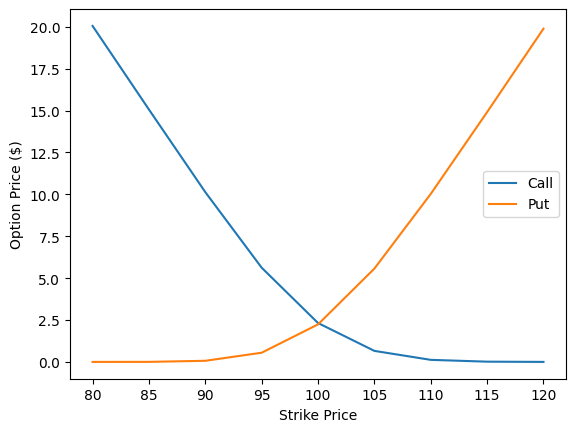

In [6]:
S = 100 
K = np.arange(80,125, 5)
r = 2
q = 1
sigma = 20
tau = 30 
Black_Scholes_Plots(S, K, r, q, tau, sigma, K, 'Strike Price')

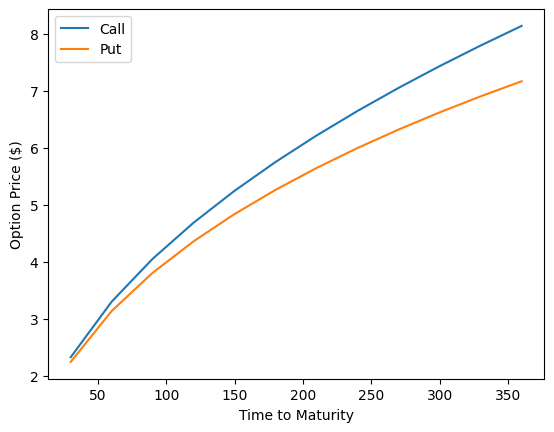

In [7]:
S = 100 
K = 100
r = 2
q = 1
sigma = 20
tau = np.arange(30, 390, 30)
Black_Scholes_Plots(S, K, r, q, tau, sigma, tau, 'Time to Maturity')

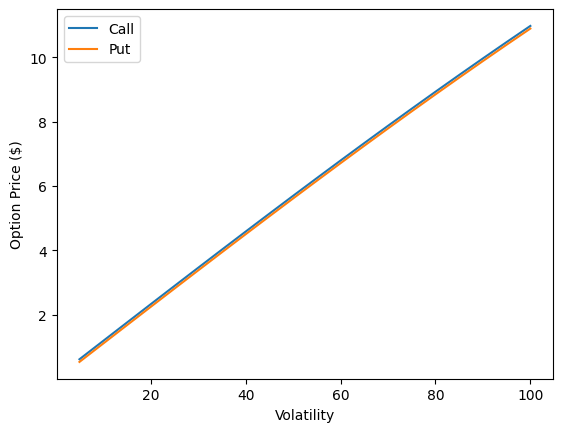

In [8]:
S = 100 
K = 100
r = 2
q = 1
sigma = np.arange(5, 105, 5)
tau = 30
Black_Scholes_Plots(S, K, r, q, tau, sigma, sigma, 'Volatility')